<a href="https://colab.research.google.com/github/anshikapanwar0/waste-object-detection/blob/main/WasteDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.8/883.8 kB 14.5 MB/s eta 0:00:00


In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt source='/content/dog.jpg'

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/dog.jpg: 576x640 1 dog, 602.9ms
Speed: 18.8ms preprocess, 602.9ms inference, 38.5ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=segment mode=predict model=yolo11n-seg.pt source='/content/dog.jpg'

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs

image 1/1 /content/dog.jpg: 576x640 1 dog, 1021.2ms
Speed: 29.9ms preprocess, 1021.2ms inference, 22.0ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!pip install ultralytics==11
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Yolov11

/content/drive/MyDrive/Yolov11


In [ ]:
!ls

data  data.yaml  runs  yolo11n.pt  yolo11n-seg.pt


In [ ]:
%cd /content/drive/MyDrive/Yolov11
!yolo task=detect mode=train model=yolo11n.pt data=data.yaml epochs=10 imgsz=224 plots=True

/content/drive/MyDrive/Yolov11
Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

In [ ]:
!ls /content/drive/MyDrive/Yolov11/runs/detect/train5

args.yaml					    labels.jpg	      train_batch1.jpg
events.out.tfevents.1731387378.18b0a97aff5d.2050.0  results.csv       train_batch2.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights


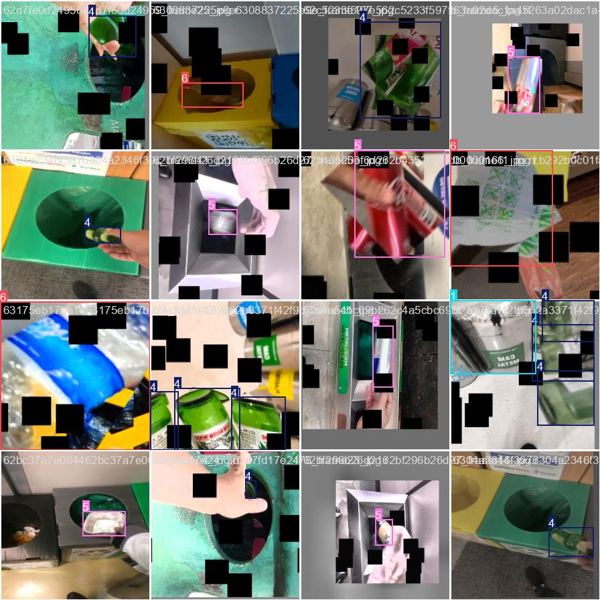

In [ ]:
from PIL import Image
from IPython.display import display

image = Image.open('/content/drive/MyDrive/Yolov11/runs/detect/train5/train_batch0.jpg')
image = image.resize((600, image.size[1] * 600 // image.size[0]))

display(image)

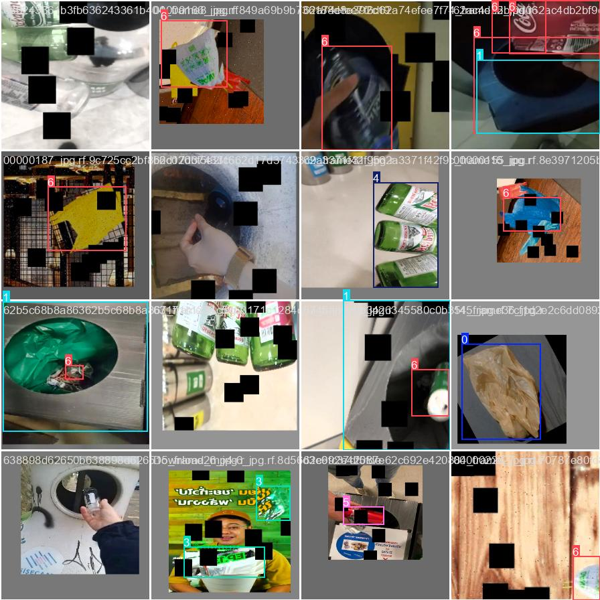

In [ ]:
from PIL import Image
from IPython.display import display

image = Image.open('/content/drive/MyDrive/Yolov11/runs/detect/train5/train_batch2.jpg')
image = image.resize((600, image.size[1] * 600 // image.size[0]))

display(image)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Yolov11/runs/detect/train5/weights/best.pt data=/content/drive/MyDrive/Yolov11/data/data.yaml

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
100% 755k/755k [00:00<00:00, 3.18MB/s]
val: Scanning /content/drive/MyDrive/Yolov11/data/valid/labels.cache... 1010 images, 151 backgrounds, 0 corrupt: 100% 1010/1010 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Yolov11/data/valid/images/63971668873496397166887351_frame3_jpg.rf.26906c3bac23b4f4658fdfc9e1db79e5.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1024, len(boxes) = 1206. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 64/64 [01:44<00:00,  1.63s/it]
                   all       1010       1206       0.53      0.811      0.702      

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolov11/runs/detect/train5/weights/best.pt conf=0.25 source=/content/plastic.jpg

Ultralytics 8.3.29 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/plastic.jpg: 192x224 1 Other, 47.4ms
Speed: 1.0ms preprocess, 47.4ms inference, 1.3ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
